In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# Load the dataset
data = pd.read_csv("Dataset .csv")
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [ ]:
# Task 1: Restaurant Reviews

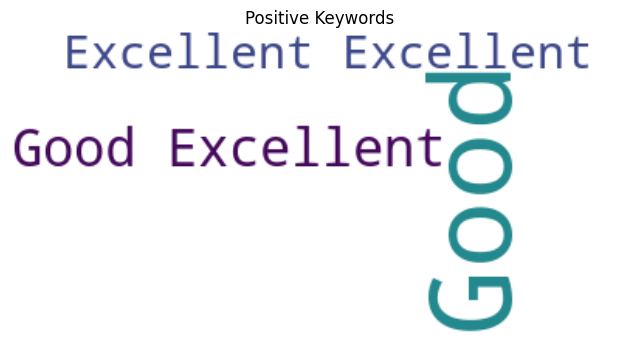

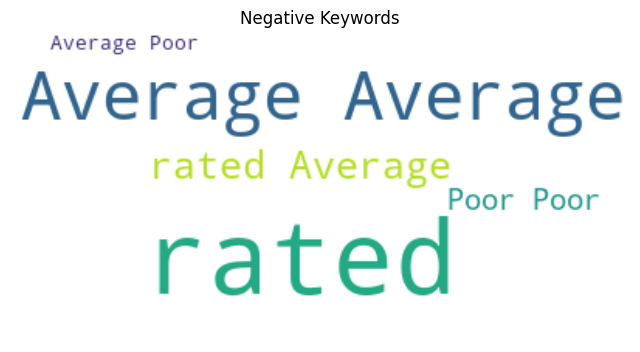

Average review length: 7.020730813527379


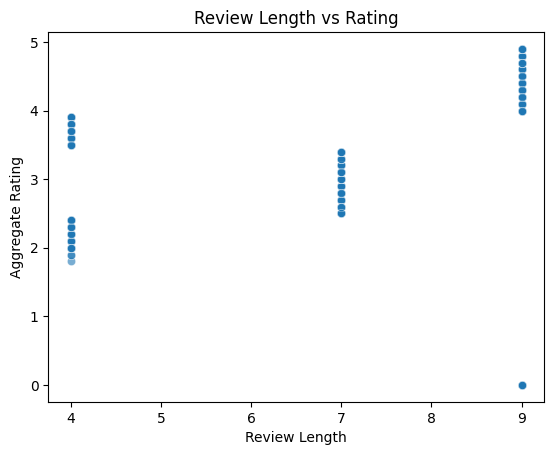

In [8]:
# WordCloud for positive and negative reviews (Assuming 'Review Text' and 'Rating' columns)
positive_reviews = " ".join(data[data['Aggregate rating'] > 4]['Rating text'].dropna())
negative_reviews = " ".join(data[data['Aggregate rating'] < 3]['Rating text'].dropna())
    
# Generate WordCloud for positive reviews
wc_pos = WordCloud(background_color='white', max_words=100).generate(positive_reviews)
plt.figure(figsize=(8, 6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Keywords")
plt.show()

# Generate WordCloud for negative reviews
wc_neg = WordCloud(background_color='white', max_words=100).generate(negative_reviews)
plt.figure(figsize=(8, 6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Keywords")
plt.show()

# Average review length
data['Review Length'] = data['Rating text'].dropna().apply(len)
avg_length = data['Review Length'].mean()
print(f"Average review length: {avg_length}")

# Relationship between review length and rating
sns.scatterplot(data=data, x='Review Length', y='Aggregate rating', alpha=0.6)
plt.title("Review Length vs Rating")
plt.xlabel("Review Length")
plt.ylabel("Aggregate Rating")
plt.show()

Restaurant with highest votes: Toit (10934 votes)
Restaurant with lowest votes: Cantinho da Gula (0 votes)


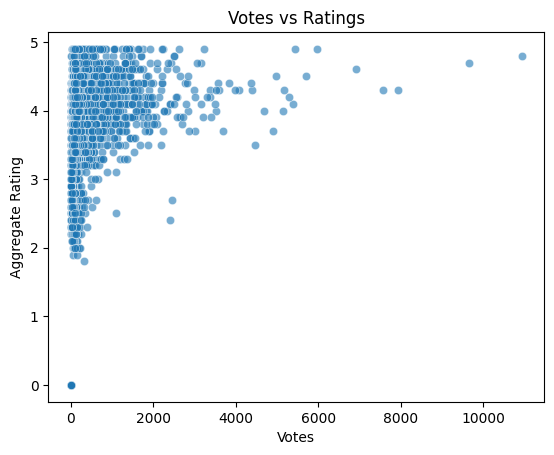

In [9]:
# Task 2: Votes Analysis

# Highest and lowest votes
highest_votes = data.loc[data['Votes'].idxmax()]
lowest_votes = data.loc[data['Votes'].idxmin()]
print(f"Restaurant with highest votes: {highest_votes['Restaurant Name']} ({highest_votes['Votes']} votes)")
print(f"Restaurant with lowest votes: {lowest_votes['Restaurant Name']} ({lowest_votes['Votes']} votes)")

    # Correlation between votes and ratings
sns.scatterplot(data=data, x='Votes', y='Aggregate rating', alpha=0.6)
plt.title("Votes vs Ratings")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.show()

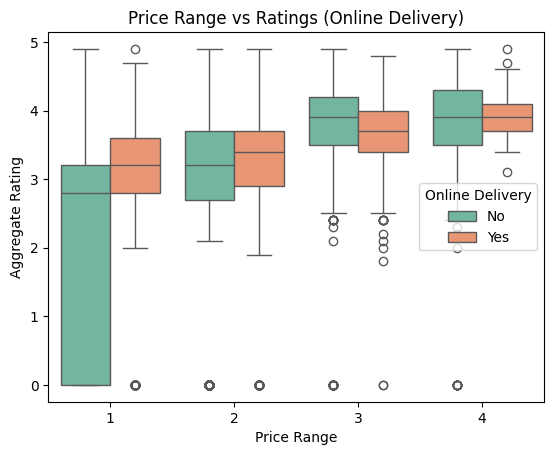

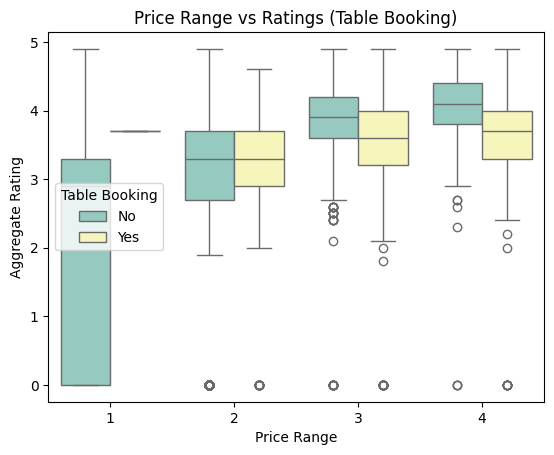

In [13]:

# Task 3: Price Range vs Online Delivery and Table Booking

# Relationship between price range and online delivery
sns.boxplot(data=data, x='Price range', y='Aggregate rating', hue='Has Online delivery', palette='Set2')
plt.title("Price Range vs Ratings (Online Delivery)")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.legend(title="Online Delivery")
plt.show()

# Relationship between price range and table booking
sns.boxplot(data=data, x='Price range', y='Aggregate rating', hue='Has Table booking', palette='Set3')
plt.title("Price Range vs Ratings (Table Booking)")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.legend(title="Table Booking")
plt.show()
